##Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

##Read the dataset to python environment

In [2]:
df=pd.read_csv('/content/Employee.csv')

In [3]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


###To show the first five rows

In [4]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


## PRE - PROCESSING

###Check basic information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

###To find the unique values

In [6]:
df['Employee ID'].nunique()

74498

Since column 'Employee Id' contains full of unique values, drop it or make it as index column.

In [7]:
df.set_index('Employee ID',inplace=True)

In [8]:
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
Employee ID,,,,,,,,,,,,,,,,,,,,,
8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
64756,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
65791,36,Female,7,Education,3989,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,Yes,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,Yes,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,No,...,4.0,Mid,Small,7,No,No,No,Good,High,Left


###The columns in the given dataset are

In [9]:
df.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

##Checking Nullvalues

In [14]:
df.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

There are null values present in 10 columns  Also 2 columns  are numerical and all other variables are categorical.

##Null value imputation

###Categorical values are imputed using Mode method

In [21]:
for i in ['Work-Life Balance','Performance Rating','Education Level','Marital Status','Job Level','Company Size','Remote Work','Employee Recognition','Attrition']:
    df[i]=df[i].fillna(df[i].mode()[0])

###Numerical null values are imputed using Median

In [22]:
for i in ['Number of Promotions','Number of Dependents',]:
    df[i]=df[i].fillna(df[i].median())

##Check again for null values

In [23]:
df.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

All null values are imputed properly

##Boxplot for checking outliers

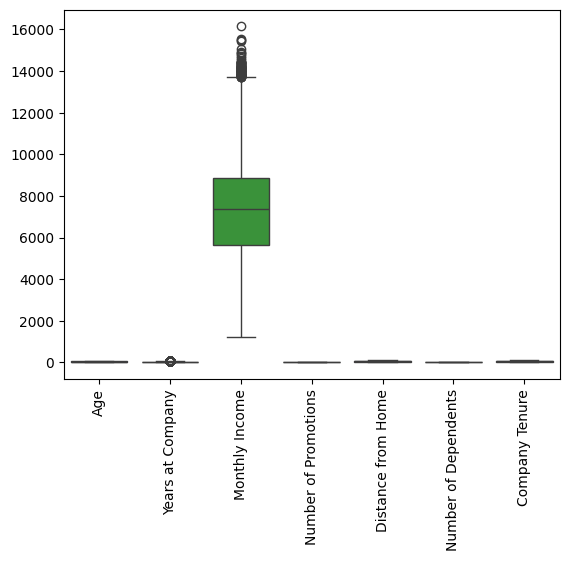

In [25]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

 Column such as Years at Company,Monthly Income contains outliers. Since it is a skewed distribution, use IQR method for outlier detection.

#IQR method for outlier detection

###Skewness detection

In [26]:
for i in ['Years at Company','Monthly Income']:
    print('Skewness value of column', i, 'is', df[i].skew())

Skewness value of column Years at Company is 0.7899082019432808
Skewness value of column Monthly Income is 0.11831228795852874


In [29]:
for i in ['Years at Company','Monthly Income']:
    Q1=np.percentile(df[i],25,method='midpoint')
    Q3=np.percentile(df[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in df[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    df[i]=df[i].clip(lower=low_lim,upper=up_lim)

#Check again for outliers using boxplot

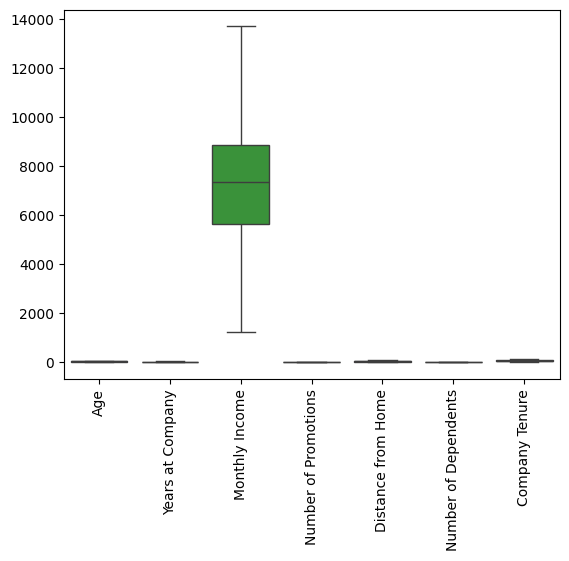

In [30]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

Now, there are no outliers present in the dataset.

##Histogram Plot

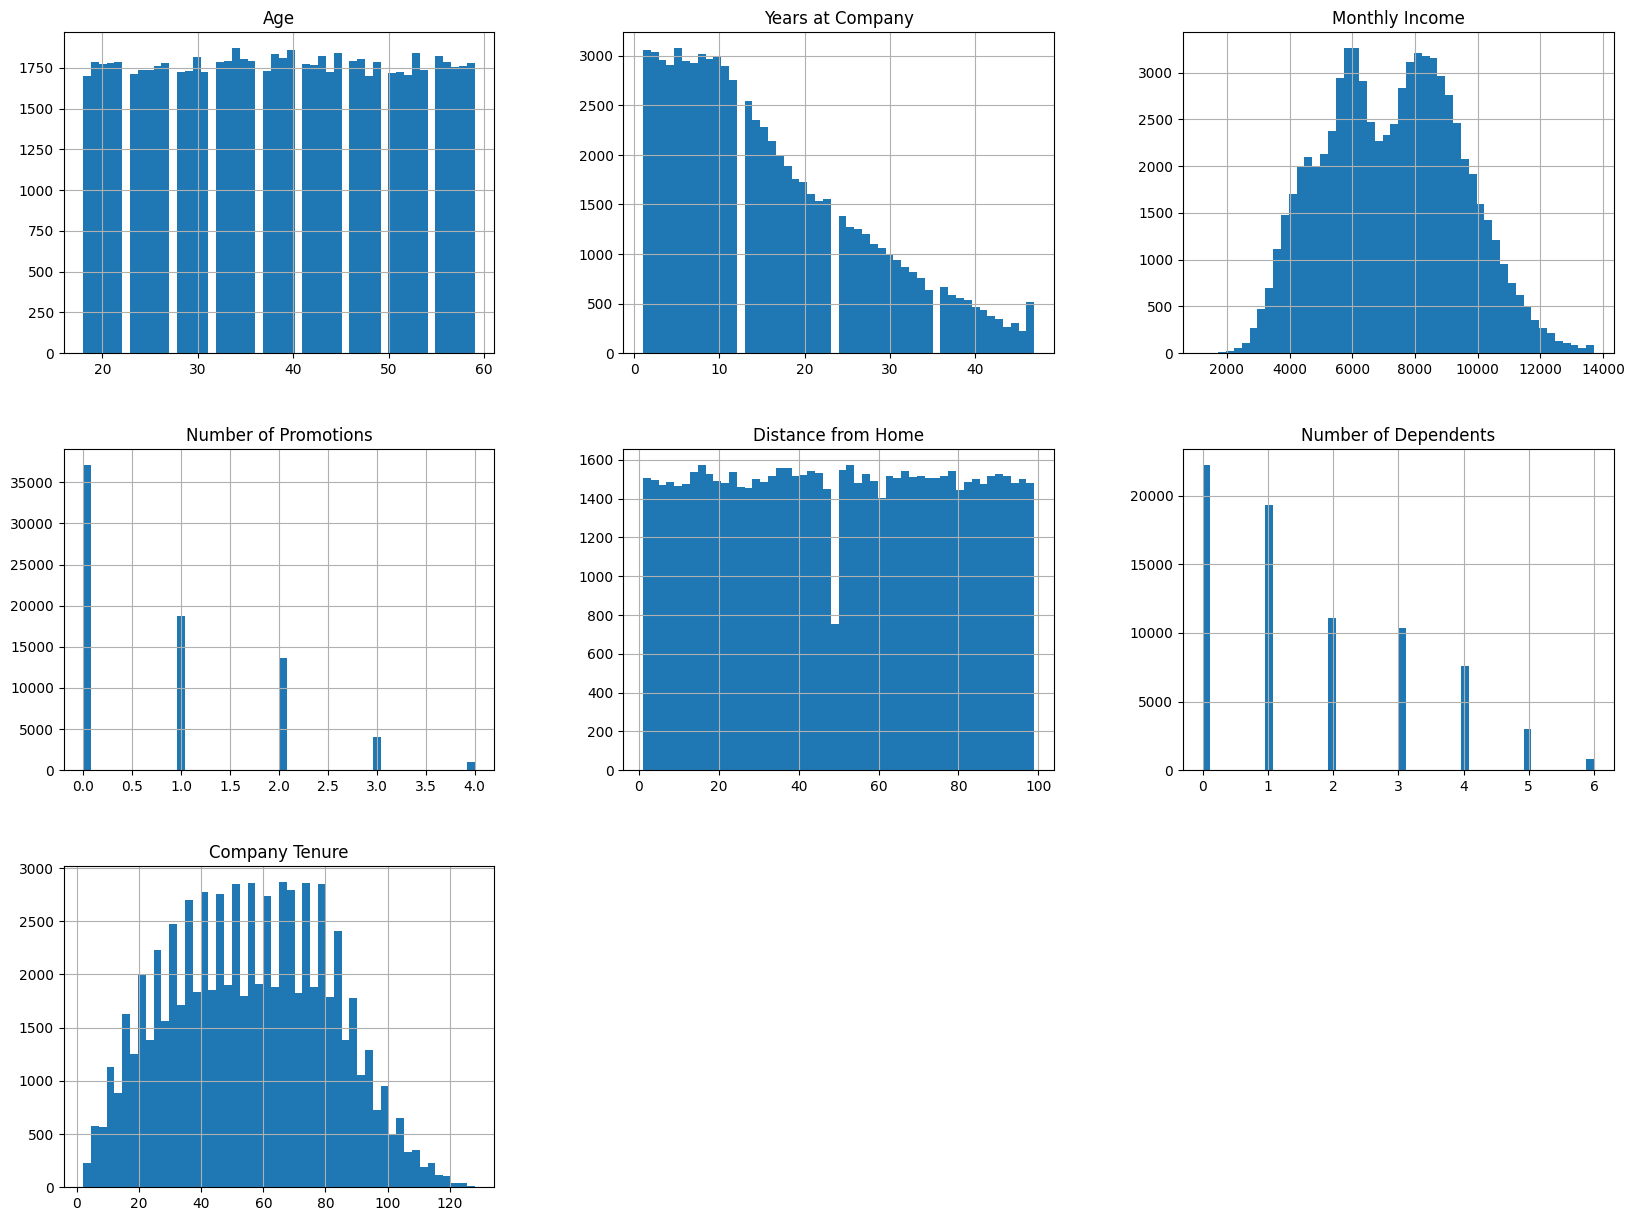

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50,figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

##Correlation

<Axes: >

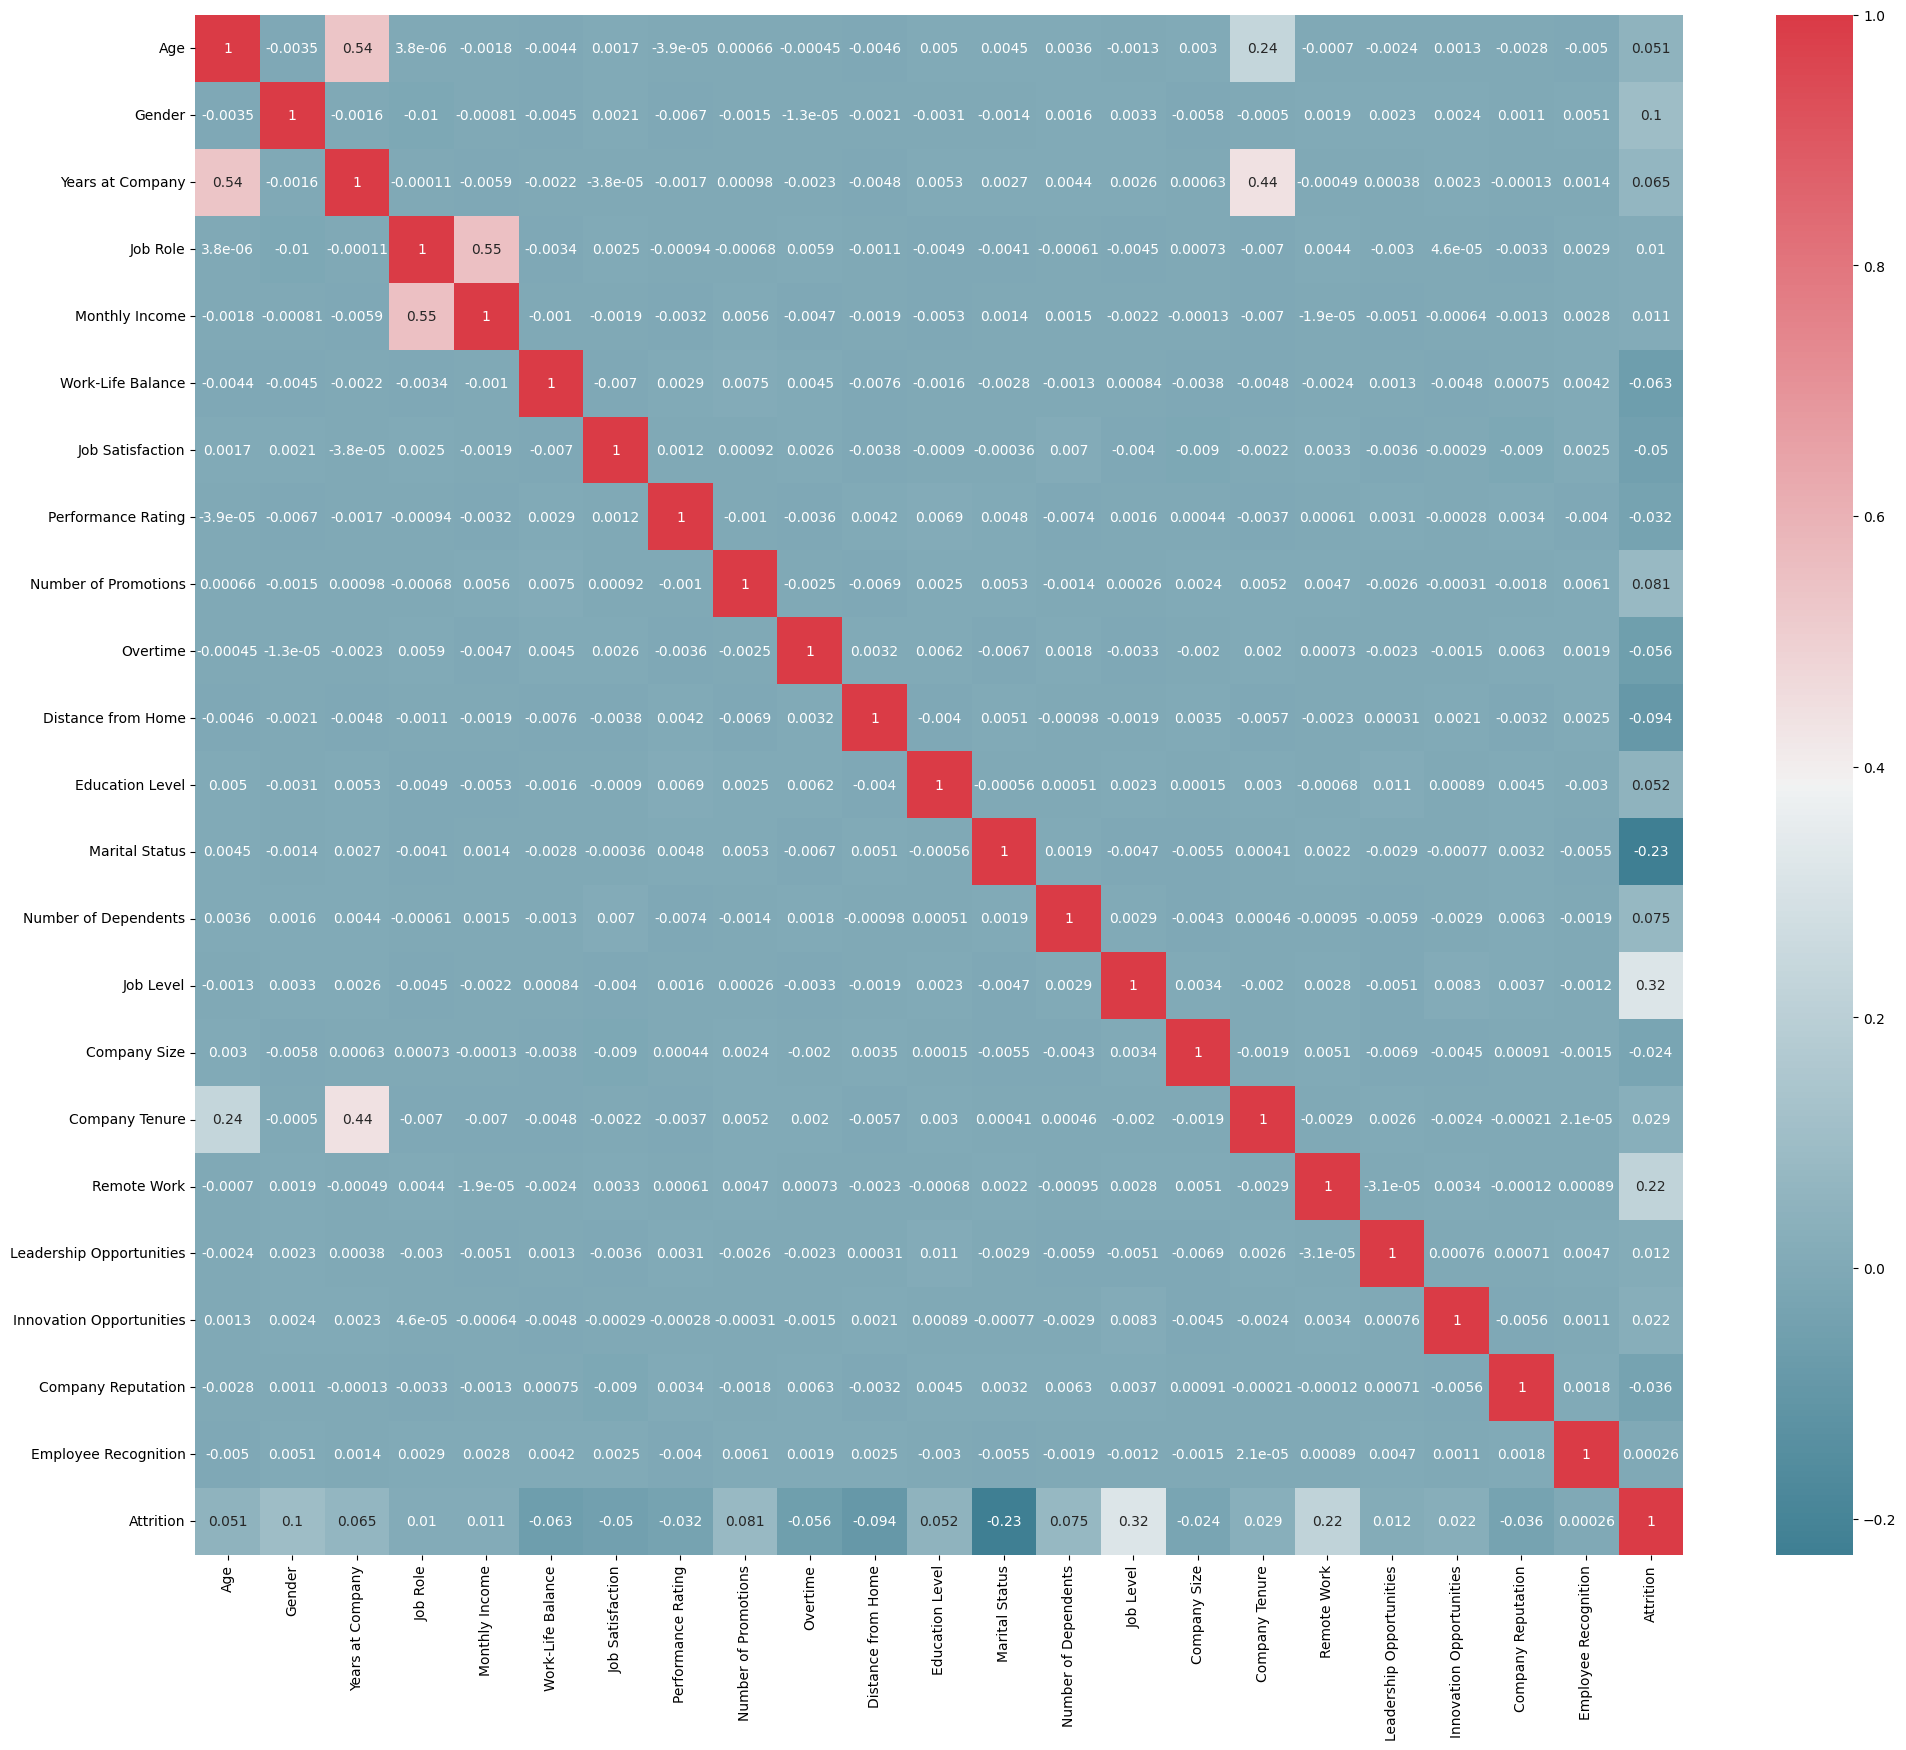

In [71]:
import seaborn as sns
plt.figure(figsize=(24,20))
cmap = sns.diverging_palette(220, 10, center='light', as_cmap=True)
sns.heatmap(data = df.corr(),annot=True,cmap=cmap)

There is no positive or negative correlation. So no features can be dropped

#Label Encoding

###As object type variables are present. we need to encode it.Here Label encoding is done

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [37]:
le=LabelEncoder()
for i in ['Gender','Job Role','Work-Life Balance', 'Job Satisfaction', 'Performance Rating','Overtime',
       'Education Level', 'Marital Status',
       'Job Level', 'Company Size','Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition']:
    df[i]=le.fit_transform(df[i])

In [38]:
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
Employee ID,,,,,,,,,,,,,,,,,,,,,
8410,31,1,19,0,5390,0,2,0,2.0,0,...,0.0,1,1,89,0,0,0,0,2,1
64756,59,0,4,3,5534,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,1
30257,24,0,10,2,8159,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,1
65791,36,0,7,0,3989,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,1
65026,56,1,41,0,4821,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16243,56,0,42,2,7830,3,2,0,0.0,1,...,0.0,2,1,60,0,0,0,3,2,1
47175,30,0,15,0,3856,2,2,0,2.0,1,...,0.0,0,1,20,0,0,0,2,2,0
12409,52,1,5,0,5654,2,3,1,0.0,0,...,4.0,1,2,7,0,0,0,2,0,0


Target variable/ dependent variable, y = Attrition

Predictor variable/ independent variable, x = All other columns

In [39]:
y = df.Attrition
X = df.drop('Attrition',axis=True)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

#LOGISTIC REGRESSION

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
logistic_precision = precision_score(y_test, logistic_reg_pred, average='macro')
logistic_recall = recall_score(y_test, logistic_reg_pred, average='macro')
logistic_f1 = f1_score(y_test, logistic_reg_pred, average='macro')
print("logistic_reg_accuracy:", logistic_reg_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,logistic_reg_pred))
print("precision_score:",logistic_precision)
print("recall_score:",logistic_recall)
print("f1_score:",logistic_f1)

logistic_reg_accuracy: 0.6718791946308725
confusion_matrix: [[4509 2587]
 [2302 5502]]
precision_score: 0.6711001447176479
recall_score: 0.6702257377334319
f1_score: 0.6704153569311591


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#DECISION TREE CLASSIFIER

In [44]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred, average='macro')
decision_tree_recall = recall_score(y_test, decision_tree_pred, average='macro')
decision_tree_f1 = f1_score(y_test, decision_tree_pred, average='macro')
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,decision_tree_pred))
print("precision_score:",decision_tree_precision)
print("recall_score:",decision_tree_recall)
print("f1_score:",decision_tree_f1)

Decision Tree Accuracy: 0.6728859060402684
confusion_matrix: [[4635 2461]
 [2413 5391]]
precision_score: 0.6721050197669369
recall_score: 0.6719922414256384
f1_score: 0.6720416196528531


#RANDOM FOREST CLASSIFIER

In [45]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred, average='macro')
random_forest_recall = recall_score(y_test, random_forest_pred, average='macro')
random_forest_f1 = f1_score(y_test, random_forest_pred, average='macro')
print("Random Forest Accuracy:", random_forest_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,random_forest_pred))
print("precision_score:",random_forest_precision)
print("recall_score:",random_forest_recall)
print("f1_score:",random_forest_f1)

Random Forest Accuracy: 0.7508053691275168
confusion_matrix: [[5239 1857]
 [1856 5948]]
precision_score: 0.7502414608369348
recall_score: 0.7502382569687907
f1_score: 0.7502398555056323


#SVC

In [46]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')
print("SVM Accuracy:", svm_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,svm_pred))
print("precision_score:",svm_precision)
print("recall_score:",svm_recall)
print("f1_score:",svm_f1)

SVM Accuracy: 0.523758389261745
confusion_matrix: [[   0 7096]
 [   0 7804]]
precision_score: 0.2618791946308725
recall_score: 0.5
f1_score: 0.3437279774489077


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Hyperparameter Tuning

In [47]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=2)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('Accuracy',accuracy_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred, average='macro'))
print("recall_score:",recall_score(y_test,y_pred, average='macro'))
print("f1_score:",f1_score(y_test,y_pred, average='macro'))

confusion_matrix [[5211 1885]
 [1911 5893]]
Accuracy 0.7452348993288591
precision_score: 0.744663138400643
recall_score: 0.7447414805346548
f1_score: 0.7447000308867445


### we are doing scaling to obtain high accuracy

##SCALING

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#LOGISTIC REGRESSION

In [56]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
logistic_precision = precision_score(y_test, logistic_reg_pred, average='macro')
logistic_recall = recall_score(y_test, logistic_reg_pred, average='macro')
logistic_f1 = f1_score(y_test, logistic_reg_pred, average='macro')
print("logistic_reg_accuracy:", logistic_reg_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,logistic_reg_pred))
print("precision_score:",logistic_precision)
print("recall_score:",logistic_recall)
print("f1_score:",logistic_f1)

logistic_reg_accuracy: 0.7223489932885906
confusion_matrix: [[4999 2097]
 [2040 5764]]
precision_score: 0.7217130758883318
recall_score: 0.7215384949873941
f1_score: 0.7216151625309318


#DECISION TREE

In [61]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred, average='macro')
decision_tree_recall = recall_score(y_test, decision_tree_pred, average='macro')
decision_tree_f1 = f1_score(y_test, decision_tree_pred, average='macro')
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,decision_tree_pred))
print("precision_score:",decision_tree_precision)
print("recall_score:",decision_tree_recall)
print("f1_score:",decision_tree_f1)

Decision Tree Accuracy: 0.6716778523489932
confusion_matrix: [[4629 2467]
 [2425 5379]]
precision_score: 0.6708978427297059
recall_score: 0.6708006315380717
f1_score: 0.670843879474819


#RANDOM FOREST CLASSIFIER

In [64]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred, average='macro')
random_forest_recall = recall_score(y_test, random_forest_pred, average='macro')
random_forest_f1 = f1_score(y_test, random_forest_pred, average='macro')
print("Random Forest Accuracy:", random_forest_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,random_forest_pred))
print("precision_score:",random_forest_precision)
print("recall_score:",random_forest_recall)
print("f1_score:",random_forest_f1)


Random Forest Accuracy: 0.7516778523489933
confusion_matrix: [[5259 1837]
 [1863 5941]]
precision_score: 0.7511186044582141
recall_score: 0.7511990136587661
f1_score: 0.7511565106114212


#SVC

In [53]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')
print("SVM Accuracy:", svm_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,svm_pred))
print("precision_score:",svm_precision)
print("recall_score:",svm_recall)
print("f1_score:",svm_f1)

SVM Accuracy: 0.7383221476510067
confusion_matrix: [[5108 1988]
 [1911 5893]]
precision_score: 0.73774337095323
recall_score: 0.7374838706135726
f1_score: 0.7375937963928751


#Hyperparameter Tuning

In [67]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=2)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('Accuracy',accuracy_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred, average='macro'))
print("recall_score:",recall_score(y_test,y_pred, average='macro'))
print("f1_score:",f1_score(y_test,y_pred, average='macro'))

confusion_matrix [[5151 1945]
 [1896 5908]]
Accuracy 0.7422147651006712
precision_score: 0.7416366463871553
recall_score: 0.7414747922176759
f1_score: 0.7415476516383211


After scaling .in Hyper tuning Random Forest classifier we got an accurcy of 0.75.So I choose this model